In [ ]:
# 코드 참조
# https://www.kaggle.com/eternalteam/cnn-examples

In [ ]:
from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
# ensure consistency across runs
from numpy.random import seed
seed(1)
import tensorflow as tf
tf.random.set_seed(2)

# Imports to view data
import cv2
from glob import glob
from matplotlib import pyplot as plt
from numpy import floor
import random

#plot_three_samples('0')

data_dir = "asl_data"
# kaggle 데이터셋 위 경로로 저장해서 진행
target_size = (64, 64)
target_dims = (64, 64, 3) # add channel for RGB
n_classes = 10 #########
val_frac = 0.1
batch_size = 64

data_augmentor = ImageDataGenerator(samplewise_center=True, 
                                    samplewise_std_normalization=True, 
                                    validation_split=val_frac)

train_generator = data_augmentor.flow_from_directory(data_dir, target_size=target_size, batch_size=batch_size, shuffle=True, subset="training")
val_generator = data_augmentor.flow_from_directory(data_dir, target_size=target_size, batch_size=batch_size, subset="validation")


Found 6607 images belonging to 10 classes.
Found 734 images belonging to 10 classes.


Samples images for letter 0
Samples images for letter 1
Samples images for letter 2
Samples images for letter 3
Samples images for letter 4


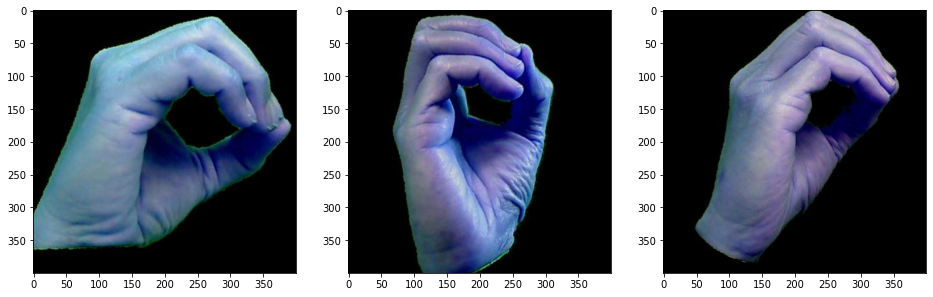

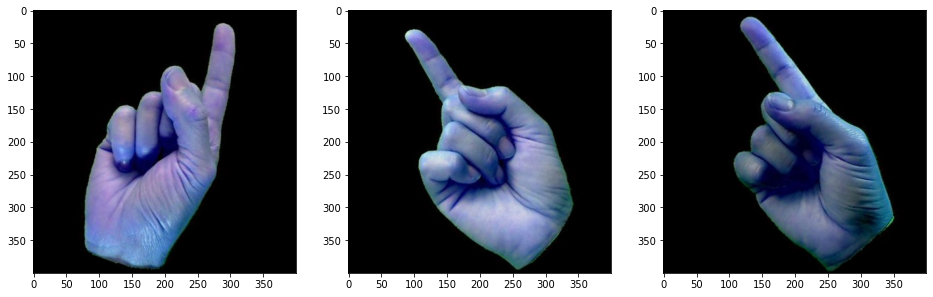

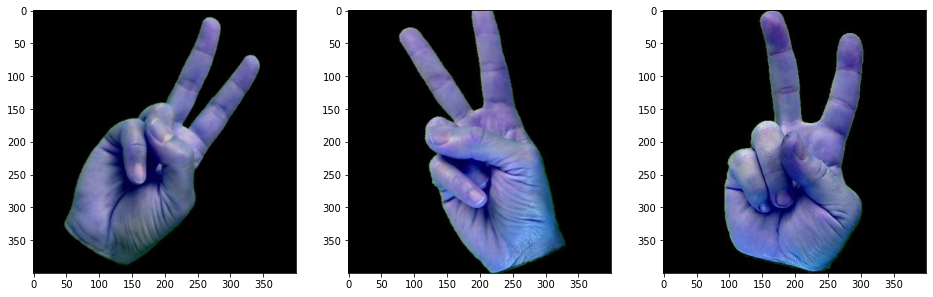

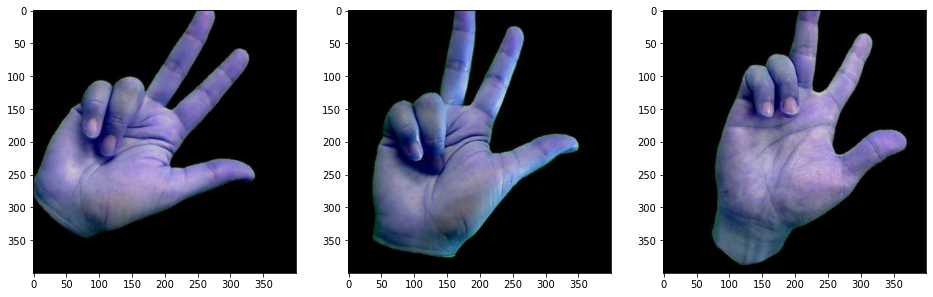

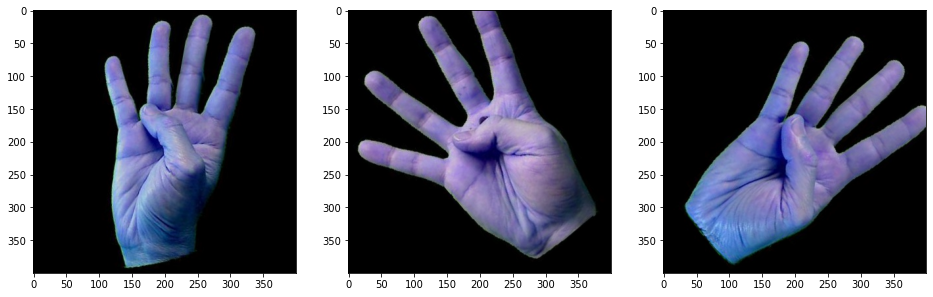

In [ ]:
def plot_three_samples(letter):
    print("Samples images for letter " + letter)
    base_path = 'asl_data/'
    # kaggle 데이터셋 위 경로로 저장해서 진행
    img_path = base_path + letter + '/**'
    path_contents = glob(img_path)
    
    plt.figure(figsize=(16,16))
    imgs = random.sample(path_contents, 3)
    plt.subplot(131)
    plt.imshow(cv2.imread(imgs[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(imgs[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(imgs[2]))
    return

for i in range(5):
    plot_three_samples(str(i))

In [ ]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    # 특정 GPU에 1GB 메모리만 할당하도록 제한
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2000)])
    except RuntimeError as e:
    # 프로그램 시작시에 가상 장치가 설정되어야만 합니s다
        print(e)
        
with tf.device('/device:GPU:0'): 
    handlang_model = Sequential()
    handlang_model.add(Conv2D(64, kernel_size=4, strides=1, activation='relu', input_shape=target_dims))
    handlang_model.add(Conv2D(64, kernel_size=4, strides=2, activation='relu'))
    handlang_model.add(Dropout(0.5))
    handlang_model.add(Conv2D(128, kernel_size=4, strides=1, activation='relu'))
    handlang_model.add(Conv2D(128, kernel_size=4, strides=2, activation='relu'))
    handlang_model.add(Dropout(0.5))
    handlang_model.add(Conv2D(256, kernel_size=4, strides=1, activation='relu'))
    handlang_model.add(Conv2D(256, kernel_size=4, strides=2, activation='relu'))
    #handlang_model.add(BatchNormalization()) #######################################
    handlang_model.add(Flatten())
    handlang_model.add(Dropout(0.5))
    handlang_model.add(Dense(1024, activation='relu')) ############################
    handlang_model.add(Dense(512, activation='relu'))
    #handlang_model.add(Dropout(0.5)) ###############################
    handlang_model.add(Dense(n_classes, activation='softmax'))

    handlang_model.summary()

    handlang_model.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=["accuracy"])

    from keras.callbacks import ModelCheckpoint
    handlang_model.fit_generator(train_generator, epochs=10, validation_data=val_generator,
                                callbacks=[ModelCheckpoint(filepath='su_dense.h5', save_best_only=True, verbose=1)])

    handlang_model.save('201211_cnn.h5')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 61, 61, 64)        3136      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 64)        65600     
_________________________________________________________________
dropout_3 (Dropout)          (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 128)       131200    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 128)       262272    
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 9, 9, 256)        